# Perform LDA on the dataset using single character delimiters

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import string

## Read in and process data

In [2]:
wiki_df = pd.read_pickle('wiki') 
wiki_df.head()

,article,views,text
0,メインページ,362562853,ようこそ\nウィキペディア - ウィキペディア日本語版 - 百科事典目次\n検索資料・ポータ...
1,星野源,10190763,星野 源（ほしの みなもと、1981年1月28日 - ）は、日本の音楽家、俳優、文筆家。埼玉...
2,真田信繁,9602104,真田 信繁（さなだ のぶしげ）は、安土桃山時代から江戸時代初期にかけての武将、大名。真田昌幸...
3,高橋一生,8571666,高橋 一生（たかはし いっせい、英字表記：Issey Takahashi、1980年12月9...
4,君の名は。,7788879,『君の名は。』（きみのなは、英: Your Name.）は、2016年に公開された新海誠監督...


In [4]:
stop = ['あそこ','あっ','あの','あのかた','あの人','あり','あります','ある','あれ','い','いう','います','いる','う','うち','え','お','および','おり','おります','か','かつて','から','が','き','ここ','こちら','こと','この','これ','これら','さ','さらに','し','しかし','する','ず','せ','せる','そこ','そして','その','その他','その後','それ','それぞれ','それで','た','ただし','たち','ため','たり','だ','だっ','だれ','つ','て','で','でき','できる','です','では','でも','と','という','といった','とき','ところ','として','とともに','とも','と共に','どこ','どの','な','ない','なお','なかっ','ながら','なく','なっ','など','なに','なら','なり','なる','なん','に','において','における','について','にて','によって','により','による','に対して','に対する','に関する','の','ので','のみ','は','ば','へ','ほか','ほとんど','ほど','ます','また','または','まで','も','もの','ものの','や','よう','より','ら','られ','られる','れ','れる','を','ん','何','及び','彼','彼女','我々','特に','私','私達','貴方','貴方方''ようこそ','ウィキペディア','ウィキペディア日本語版','百科事典目次','検索資料','空白','補助記号','）', '（', '、', '『', '』', '・','：', '／', '＋', '→', '「', '」', ' ', '-', '/', '\\']
stop += list(string.printable)

In [5]:
data = np.array(wiki_df['text'])

In [7]:
# Remove stop characters and split text using spaces
new_data = []
for cur_row in data:
    string_append = ""
    for cur_character in cur_row:
        if cur_character not in stop:
            string_append += cur_character + " "
    string_append.strip()
    new_data.append(string_append)

## Vectorize and perform LDA

In [8]:
# Vectorize the data
tf_vectorizer = CountVectorizer(stop_words=None, max_df=1, analyzer="char")
tf = tf_vectorizer.fit_transform(new_data)
vocabulary = tf_vectorizer.vocabulary_

In [9]:
# Initialize LDA
lda = LatentDirichletAllocation(n_components=15)

In [10]:
# Fit LDA model
lda.fit(tf)

LatentDirichletAllocation(n_components=15)

In [11]:
# Print the top 10 terms for each topic
tf_feature_names = tf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #" + str(topic_idx) + ": " + 
          str(['{}'.format(tf_feature_names[i]) for i in topic.argsort()[:-10 - 1:-1]]))

Topic #0: ['谜', '糄', '跆', '莅', '𥻨', '詑', '㆑', '挹', '鑰', '瀏']
Topic #1: ['눈', '입', 'བ', 'འ', 'ྲ', '偷', '姸', '緲', '剑', '贞']
Topic #2: ['瓠', 'ơ', '雒', 'མ', 'ོ', 'त', 'ầ', '槊', '奵', '絁']
Topic #3: ['帙', '獸', '殂', '佯', '墉', '洮', '懶', '鵙', '膊', '沾']
Topic #4: ['癋', '￡', '饋', '𓄤', '剗', 'ื', '懷', '瑄', '⁵', '腟']
Topic #5: ['ㇷ', '゚', '砬', '僉', 'ㇿ', 'ㇱ', '睟', '藜', '轎', '르']
Topic #6: ['蟜', '麃', '橑', '鶮', '鰒', '藺', '麑', 'ூ', 'ங', '❀']
Topic #7: ['ㆍ', 'ް', 'ި', 'မ', '┴', '┐', '敕', 'ޖ', 'ާ', 'ހ']
Topic #8: ['巛', '따', '👑', '앵', '켜', '𓏤', '吋', '┛', '凞', '겐']
Topic #9: ['┌', '┤', '荽', 'ᠡ', 'ᠨ', '├', '셀', '领', '瑰', '玫']
Topic #10: ['㋮', '⌊', '⌋', 'ং', 'ত', 'ল', 'প', 'ি', '沘', 'غ']
Topic #11: ['鰲', '蝪', '禳', '銼', '짱', 'ᡠ', 'ᡥ', 'ᠣ', '鑲', '鯷']
Topic #12: ['⟩', '昰', '禑', '烷', '埗', '历', '粵', '♨', '⊕', '泟']
Topic #13: ['霾', '勸', '尘', '臛', '頞', '褓', '襁', '藾', '븐', '↵']
Topic #14: ['粽', '翬', '♟', '巿', '탄', '단', '剄', 'ĭ', 'ῦ', '汴']


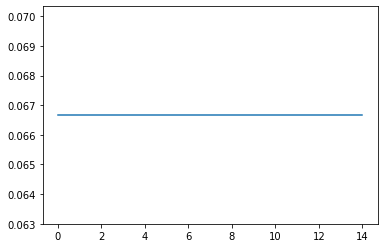

In [12]:
# Plot the topic distribution of document 10 - see that it's uniform across topics
features = lda.transform(tf)
plt.plot(pd.DataFrame(features).loc[10])
plt.show()